In [1]:
import os
import glob

import pandas as pd
from pyteomics import mzml  # Library used to open mzml format files (spectra format)
from pyteomics.mass import calculate_mass  # Monoisotopic mass calculation

from spectrum import Spectrum

### Metadata in the DB

In [2]:
metadata_df = pd.read_excel('data/database_trap/database/metadata.xlsx', index_col='file_name')
metadata_df = metadata_df[metadata_df['trap_db'] == True]
metadata_df = metadata_df.drop('trap_db', axis=1)
# Calculation of monoisotopic mass of a substance (ion_type='M' - neutral molecule)
metadata_df['monoisotopic_mass'] = metadata_df['molecular_formula'].apply(lambda x: calculate_mass(formula=x, ion_type='M'))
metadata_df

,substance_name,other_names,molecular_formula,cas,monoisotopic_mass
file_name,,,,,
Hexane_DB,Hexane,n-Hexane,C6H14,110-54-3,86.109550
Chloroform_DB,Chloroform,"Methane trichloride; Methane, trichloro-",CHCl3,67-66-3,117.914383
NitroMethan_DB,Nitromethane,"Methane, nitro-",CH3NO2,75-52--5,61.016378
DMSO_DB,Dimethyl sulfoxide,Dimethyl sulphoxide; (Methylsulfinyl)methane; ...,C2H6OS,67-68-5,78.013936
Cyclohexane_DB,Cyclohexane,-,C6H12,110-82-7,84.093900
Toluene_DB,Toluene,Methyl benzene,C7H8,108-88-3,92.062600
Aniline_DB,Aniline,1-Aminobenzene; Aminobenzene,C6H7N,62-53-3,93.057849
Dioxane_DB,"1,4-Dioxane","1,4-Diethylenedioxide; 1,4-Dioxacyclohexane",C4H8O2,123-91-1,88.052429
Benzene_DB,Benzene,-,C6H6,71-43-2,78.046950


### Load spectra measured on the Trap

In [4]:
mzml_files = glob.glob('data/database_trap/database/*.mzml')  # List of all mzml files in the data/database_trap/database

spectra_db = []
step = 1  # Sampling step

for file_path in mzml_files:  # Go through each file
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    ms_data = mzml.read(file_path)
    spectrum = list(ms_data)[0]
    
#     print(f'A .mzml file has been detected: {file_path}')

    mz = spectrum.pop('m/z array')
    intensities = spectrum.pop('intensity array')

    metadata = metadata_df.loc[file_name].to_dict()
    substance_name = metadata.pop('substance_name')
    spectrum = Spectrum(mz, intensities, substance_name, **metadata)  # Create a Spectrum object
    spectrum.resample(step) # Changing the sampling step

    spectra_db.append(spectrum)

print('An example of a spectrum with metadata obtained on the Trap:')
print(vars(spectra_db[0]))

An example of a spectrum with metadata obtained on the Trap:
{'mz': array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
        14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
        36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,
        47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,
        58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,
        69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,
        80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
       102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112.,
       113., 114., 115., 116., 117., 118., 119., 120., 121.]), 'intensities': array([0.00000000e+00, 6.46137200e+07, 5.86652400e+07, 3.59619600e+07,
       2.48456920e+07, 9.59745200e+07, 1.49176160e+07

### Load background spectrum

In [5]:
file_path = 'data/database_trap/background/Background.mzml'
ms_data = mzml.read(file_path)
spectrum_bg = list(ms_data)[0]
mz = spectrum_bg.pop('m/z array')
intensities = spectrum_bg.pop('intensity array')
metadata = {}
substance_name = 'Air'
spectrum_bg = Spectrum(mz, intensities, substance_name, **metadata)  # Create a Spectrum object
spectrum_bg.resample(step) # Changing the sampling step

print("Background spectrum obtained on the Trap:")
print(vars(spectrum_bg))

Background spectrum obtained on the Trap:
{'mz': array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
        14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
        36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,
        47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,
        58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,
        69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,
        80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
       102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112.,
       113., 114., 115., 116., 117., 118., 119., 120., 121., 122., 123.,
       124., 125., 126., 127., 128., 129., 130., 131., 132., 133., 134.,
       135., 136., 137., 138., 139., 140., 141., 142., 143., 144., 145.,
  

### Background spectrum subtraction from DB spectra, normalization and filtering

In [6]:
threshold = 0.001
for spectrum in spectra_db:
    spectrum.background_subtraction(spectrum_bg)  # Subtract the background spectrum from the database spectrum
    spectrum.normalize()  # Min-max normalization
    spectrum.apply_threshold(threshold) # Cutting off values below the threshold

###  Forming the DB

In [7]:
results_path = 'results/database_trap'

for spectrum in spectra_db:
#     spectrum.barplot()
    with open(f'{results_path}/{spectrum.metadata["cas"]}.txt', 'w') as f:
        f.write(f'cas: {spectrum.metadata["cas"]}\n' +
                f'substance_name: {spectrum.substance_name}\n' +
                f'other_names: {spectrum.metadata["other_names"]}\n' +
                f'molecular_formula: {spectrum.metadata["molecular_formula"]}\n' +
                f'monoisotopic_mass: {spectrum.metadata["monoisotopic_mass"]}\n' +
                f'array_length: {len(spectrum.mz)}\n' +
                f'mz: {list(spectrum.mz)}\n' +
                f'intensities: {list(spectrum.intensities)}') 

### Build the database in .xlsx

In [8]:
db = [spectrum.to_dict() for spectrum in spectra_db]
df = pd.DataFrame(db)
df.to_excel(f'{results_path}/database_trap.xlsx', index=False)

### Cosine measures matrix

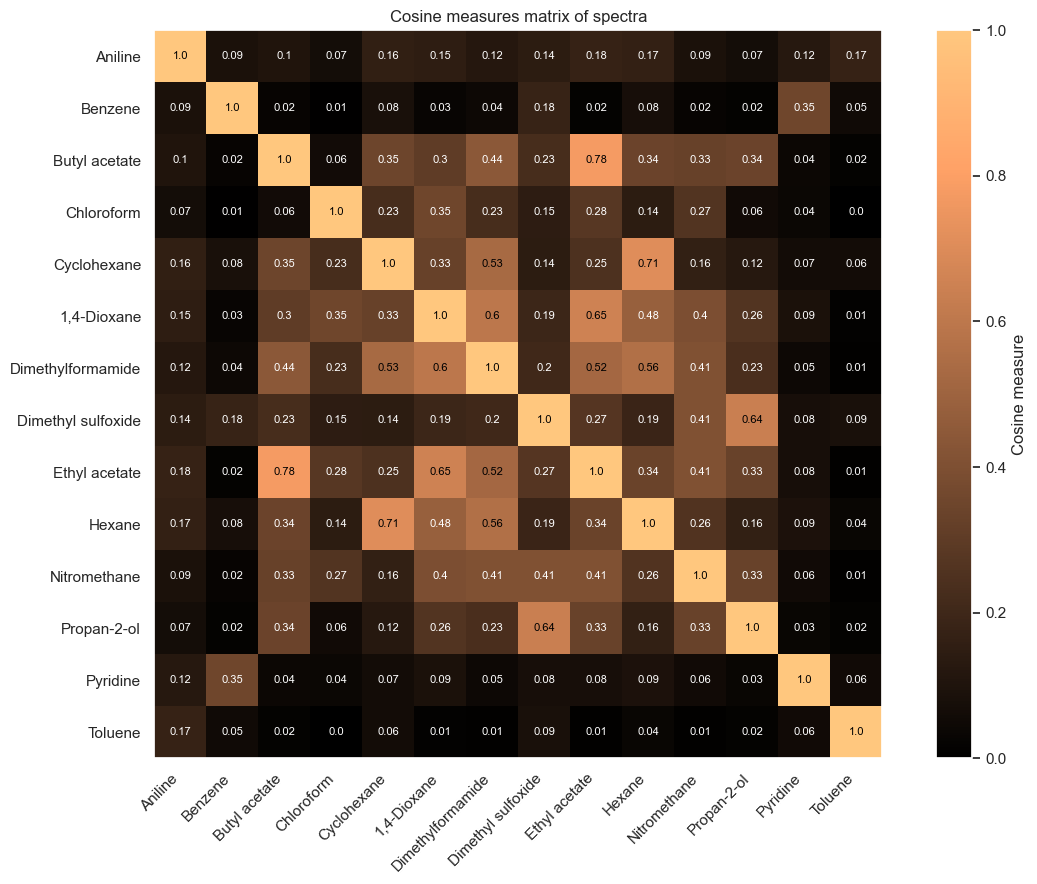

In [9]:
Spectrum.cosine_measures_matrix_plot(spectra_db)